# Spatial data visualization

---

### Kompetensi 
- Mampu memvisualisasikan data meteorologi maritim pada peta spasial menggunakan Cartopy.
- Mampu mengintegrasikan data shapefile (batas wilayah pelayanan provinsi) menggunakan geopandas untuk analisis dan visualisasi data.

### Indikator keberhasilan
1. Peserta dapat memvisualisasikan data meteorologi maritim pada peta menggunakan Cartopy.
2. Peserta dapat menambahkan layer peta (coastline, gridlines, batas wilayah) untuk visualisasi yang lebih informatif.
3. Peserta dapat membaca dan memproses data shapefile menggunakan Geopandas.
4. Peserta dapat mengintegrasikan data shapefile (batas wilayah pelayanan  provinsi) dengan data meteorologi maritim untuk analisis spasial.



---

### Intro

Plot peta spasial merupakan bagian fundamental dari analisis data meteorologi maritim. Peta spasial sangat berbeda dengan visualisasi data biasa karena:
- plot peta memerlukan proyeksi koordinat geografis dari 3d ke 2d,
- plot peta memerlukan dekorasi tambahan selain data yang akan diplot (seperti daratan, garis pantai, dst).

Pada chapter ini, kita akan memperlajari visualisasi peta secara spasial memanfaatkan library `cartopy`.

In [40]:
# load module

import cartopy
import cartopy.crs as ccrs

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

## Cartopy untuk visualisasi peta spasial

Cartopy dibangun dengan [PROJ.4](https://proj4.org/), numpy, shapely, dan matplotlib. Fitur utamanya terletak pada proyeksi berbasis class dengan kemampuan transformasi fitur geografis (line, polygon, dst).

In [3]:
ccrs.PlateCarree()

<Projected CRS: +proj=eqc +ellps=WGS84 +a=6378137.0 +lon_0=0.0 +to ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (unknown)
- N[north]: Northing (unknown)
- h[up]: Ellipsoidal height (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Equidistant Cylindrical
Datum: Unknown based on WGS 84 ellipsoid
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Salah satu metode yang paling berguna yang ditambahkan oleh class di atas kelas Axes standar dari matplotlib adalah method `coastlines`. Tanpa argumen apa pun, metode ini akan menambahkan data garis pantai dari Natural Earth dengan skala 1:110.000.000 ke peta.

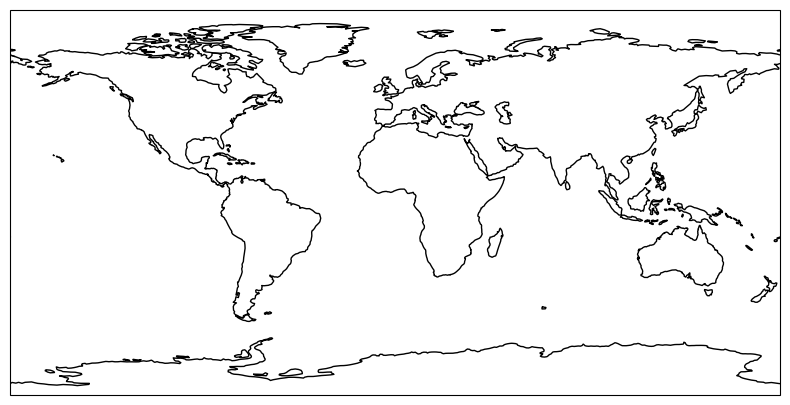

In [26]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

Kita juga bisa membuat subplot matplotlib dengan salah satu dari banyak pendekatan yang tersedia. Sebagai contoh, fungsi plt.subplots bisa digunakan:

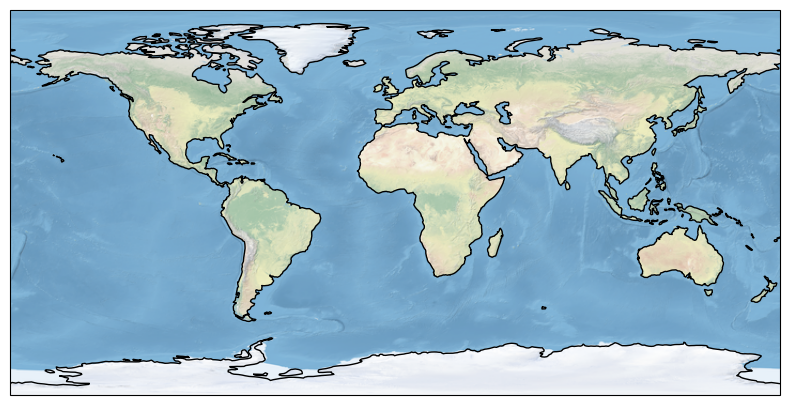

In [27]:
fig, ax = plt.subplots(figsize=(10,5), subplot_kw={'projection':ccrs.PlateCarree()})
ax.stock_img()
ax.coastlines()

#### Regional map dan fitur

Plot peta regional dapat dilakukan menggunakan method .`set_extent`. 

Beberapa fitur yang dapat ditambahkan kedalam map.

| Fitur | Deskripsi | 
| :- | :- |
| `cartopy.features.BORDERS` | Batas negara |
| `cartopy.features.COASTLINE` | Batas pantai |
| `cartopy.feature.LAKES` | Poligon danau |
| `cartopy.feature.LAND` | Poligon darat |
| `cartopy.feature.OCEAN` | Poligon laut |
| `cartopy.feature.RIVERS` | Line sungai |

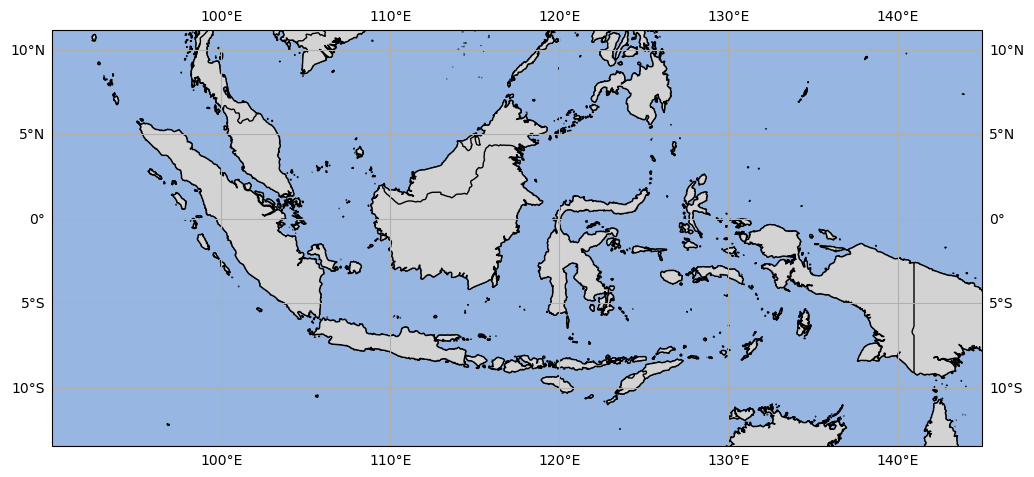

In [150]:
import cartopy.feature as cfeature
import numpy as np

coastline10 = cfeature.NaturalEarthFeature(category='physical', name='coastline', scale='10m')
land10 = cfeature.NaturalEarthFeature(category='physical', name='land', scale='10m')
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

extent = [90, 145, -12, 10]
ax.set_extent(extent)

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(coastline10, edgecolor='black')
ax.add_feature(land10, facecolor='lightgrey', edgecolor='black')
ax.add_feature(cartopy.feature.BORDERS)
# ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
# ax.add_feature(cartopy.feature.RIVERS)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

#### Plot data (1D)

Sampel data Marine Automatic Weather Station untuk Plot water level pada peta cartopy.

In [50]:
import pandas as pd

df = pd.read_csv("data/sample_aws.csv").dropna().reset_index(drop=True)
display(df.head(3))
df.columns

,dat,wind_force_QC,wind_direction,lon,station_id,sunshine_total_QC,imei,sunshine_total_offset,tt_logger,water_sea_level_QC,...,wind_direction_QC,sea_surface_salinity_offset,wind_direction_offset,maximum_temperature_QC,wind_max_1h_QC,rr10,dew_point_temperature,battery_level_QC,bmkg_id,dew_point_temperature_offset
0,2025-01-01,1.0,208.60,111.728834,wigos_id:0-22000-0-5301768,1.0,300234068448940,0.0,27.0,1.0,...,1.0,0.0,-2.00,1.0,1.0,0.0,297.25,1.0,PBU,0.0
1,2025-01-01,1.0,211.77,136.076831,wigos_id:0-22000-0-5301795,1.0,300534061806700,0.0,27.0,1.0,...,1.0,0.0,-5.33,1.0,1.0,0.0,297.75,1.0,BIK,0.0
2,2025-01-01,1.0,204.80,117.206440,wigos_id:0-22000-0-5301785,1.0,300534061608660,0.0,27.0,1.0,...,1.0,0.0,-3.00,1.0,1.0,0.0,298.45,1.0,SMR,0.0


Index(['dat', 'wind_force_QC', 'wind_direction', 'lon', 'station_id',
       'sunshine_total_QC', 'imei', 'sunshine_total_offset', 'tt_logger',
       'water_sea_level_QC', 'wind_force_offset', 'wl_radar',
       'minimum_temperature_offset', 'rr10_offset', 'tt_logger_QC',
       'wind_max_1h_direction', 'rr', 'wl_radar_QC', 'pressure', 'ph_sea_QC',
       'battery_level', 'sea_surface_salinity_QC', 'sea_temperature_offset',
       'ssr_sea_max', 'minimum_temperature', 'avg_relative_humidity_QC',
       'maximum_temperature', 'ssr_sea_QC', 'ssr_sea_offset',
       'tt_logger_offset', 'water_sea_level_offset', 'wl_radar_offset',
       'pressure_QC', 'process', 'ssr_sea', 'ph_sea', 'temperature_QC',
       'sunshine_total', 'wind_max_1h_direction_offset', 'temperature_offset',
       'sea_temperature_QC', 'temperature', 'rr_offset',
       'avg_relative_humidity_offset', 'wind_max_1h_offset', 'lat',
       'dew_point_temperature_QC', 'station_name', 'sea_temperature',
       'ssr_sea_ma

In [180]:
dfsel = df[['water_sea_level', 'lon', 'lat', 'station_name']]
display(dfsel.head())

,water_sea_level,lon,lat,station_name
0,2.206,111.728834,-2.739063,PANGKALAN BUN
1,2.587,136.076831,-1.185679,BIAK
2,3.123,117.206440,-0.570467,SAMARINDA
3,5.240,104.488350,-2.217510,PALEMBANG
4,3.463,125.014493,1.698828,LIKUPANG


/home/tyo/miniconda3/envs/ofs/lib/python3.13/site-packages/matplotlib/collections.py:1008: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/home/tyo/miniconda3/envs/ofs/lib/python3.13/site-packages/matplotlib/collections.py:1008: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/home/tyo/miniconda3/envs/ofs/lib/python3.13/site-packages/matplotlib/collections.py:1008: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


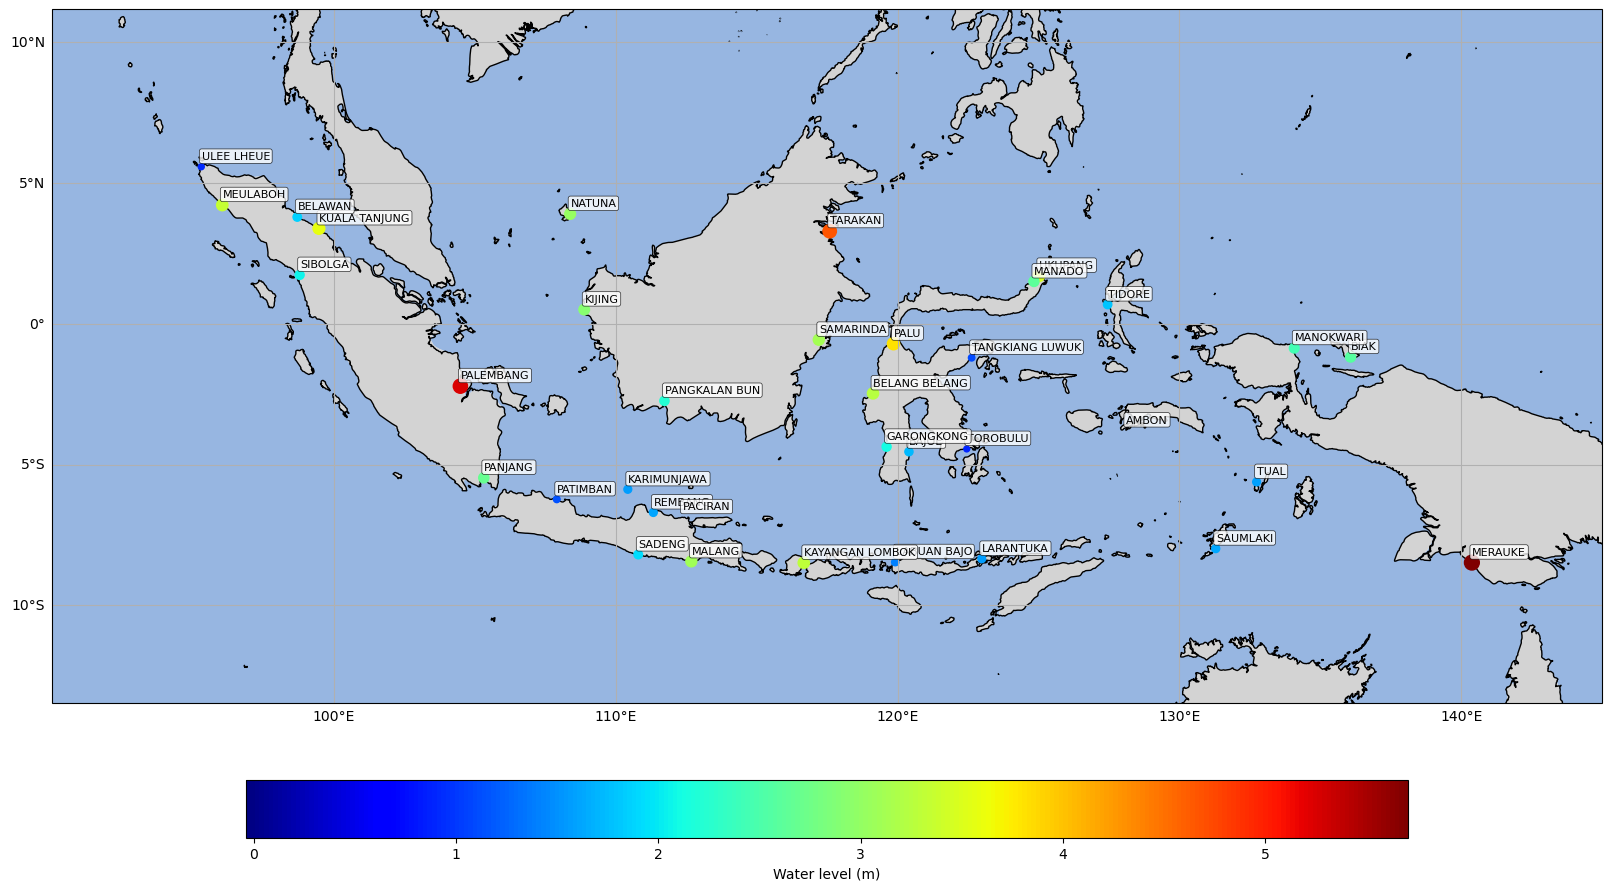

In [99]:
# axis initialization
fig, ax = plt.subplots(figsize=(20,20), dpi=100, subplot_kw={'projection':ccrs.PlateCarree()})

# cartopy features
extent = [90, 145, -12, 10]
ax.set_extent(extent)
ax.coastlines('10m')
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, facecolor='lightgrey')

# plot data onto map
plot = ax.scatter(x=df['lon'], y=df['lat'], c=df['water_sea_level'], s=20*df['water_sea_level'], cmap='jet', zorder=2)
for _, row in df.iterrows():
    ax.text(row['lon']+0.01, row['lat']+0.2, row['station_name'],
            fontsize=8, ha='left', va='bottom', transform=ccrs.PlateCarree(),
                bbox=dict(
                facecolor='white',
                edgecolor='black',
                boxstyle='round,pad=0.2',
                linewidth=0.5,
                alpha=0.8
            )
    )

# add gridlines
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.top_labels = False
gl.right_labels = False

# add colorbar
plt.colorbar(plot, label='Water level (m)', shrink=0.75, orientation='horizontal', pad=0.05)
plt.show()

#### Plot data (2D)

Sampel data InaWaves hindcast untuk plot significant wave height di atas cartopy.

In [39]:
dset = xr.open_dataset("http://web.pusmar.id:8082/opendap/inawaves_hindcast/2025/H_hires_202501.nc")
dset

<xarray.Dataset> Size: 14GB
Dimensions:  (time: 249, lat: 481, lon: 881)
Coordinates:
  * time     (time) datetime64[ns] 2kB 2025-01-01 ... 2025-02-01
  * lat      (lat) float32 2kB -15.0 -14.94 -14.88 -14.81 ... 14.88 14.94 15.0
  * lon      (lon) float32 4kB 90.0 90.06 90.12 90.19 ... 144.9 144.9 145.0
Data variables: (12/17)
    hs       (time, lat, lon) float64 844MB ...
    hmax     (time, lat, lon) float64 844MB ...
    dir      (time, lat, lon) float64 844MB ...
    dp       (time, lat, lon) float64 844MB ...
    lm       (time, lat, lon) float64 844MB ...
    t01      (time, lat, lon) float64 844MB ...
    ...       ...
    ptp00    (time, lat, lon) float64 844MB ...
    ptp01    (time, lat, lon) float64 844MB ...
    ptp02    (time, lat, lon) float64 844MB ...
    pdi00    (time, lat, lon) float64 844MB ...
    pdi01    (time, lat, lon) float64 844MB ...
    pdi02    (time, lat, lon) float64 844MB ...
Attributes:
    source:       Inawaves - BMKG Ocean Forecast System (OFS)
    description:  Inawaves Model - Hindcast
    institution:  BMKG - Center For Marine Meteorology
    email:        produksi.maritim@bmkg.go.id
    Conventions:  CF-1.8

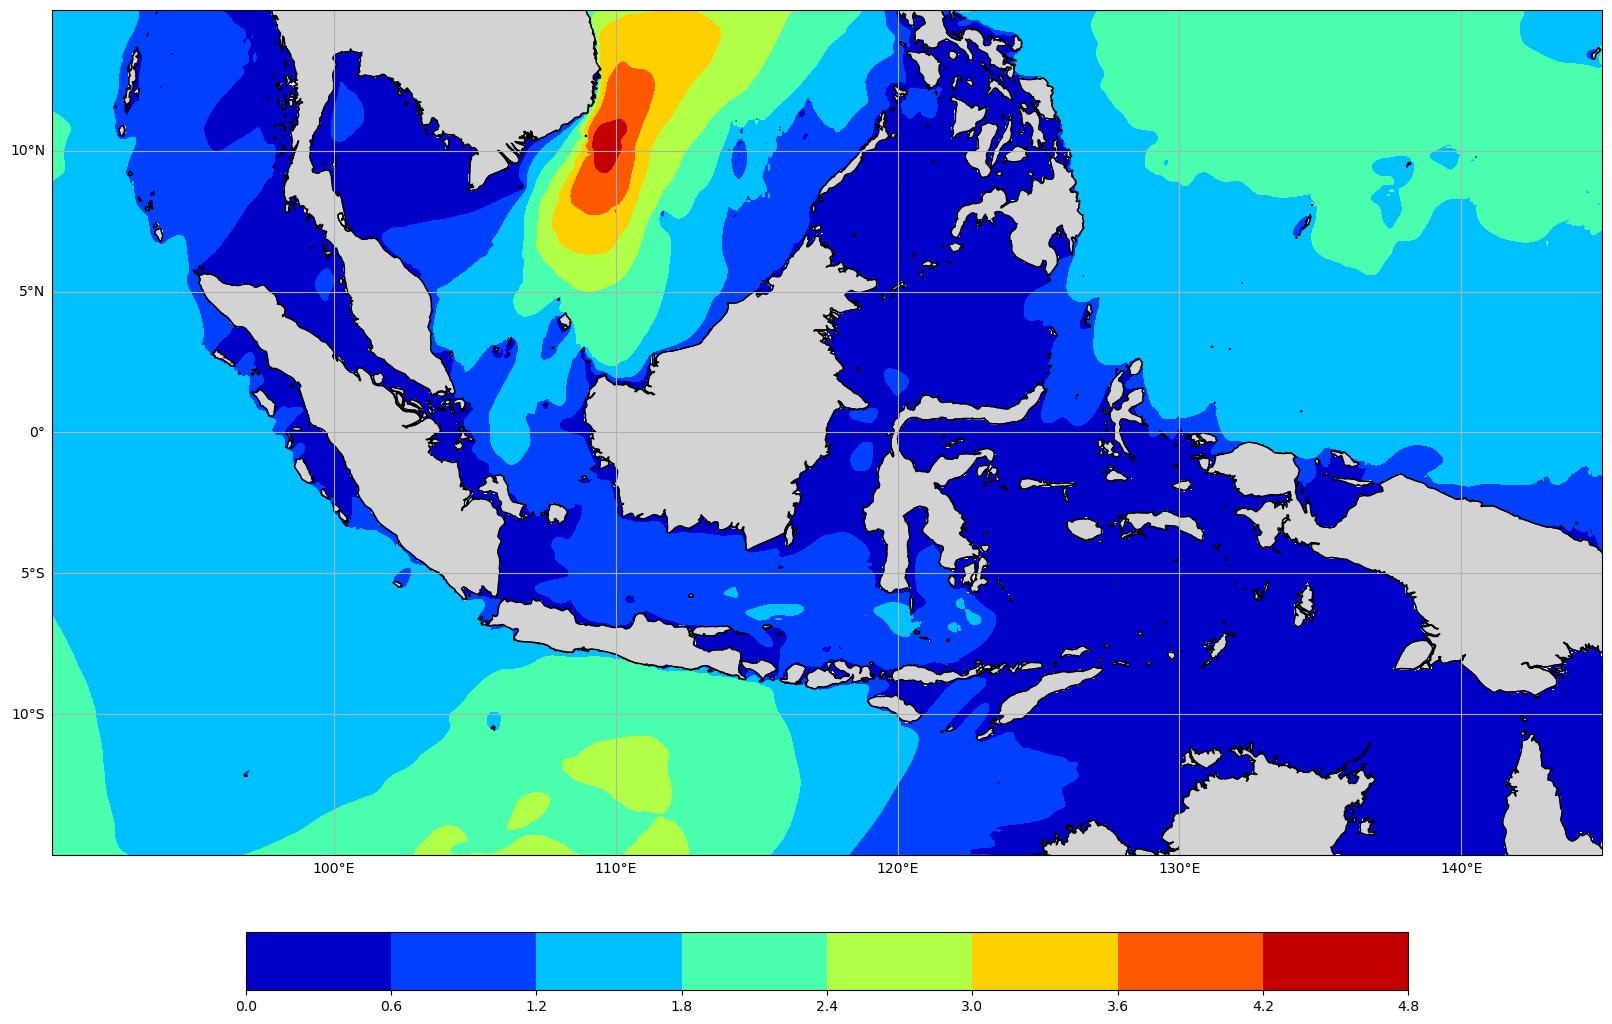

In [184]:
fig, ax = plt.subplots(figsize=(20,20), subplot_kw={'projection':ccrs.PlateCarree()})
extent = [90, 145, -12, 10]

ax.coastlines('10m')
ax.add_feature(cartopy.feature.LAND, facecolor='lightgrey', edgecolor='black')
mag = ax.contourf(dset.lon.data, dset.lat.data, dset.hs[0].data, cmap='jet', transform=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

plt.colorbar(mag, shrink=.75, pad=0.05, orientation='horizontal')

Menambahkan informasi arah gelombang menggunakan method `.quiver`. 

Anatomi arrow di matplotlib.

<a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html"><div align='center'><img src="https://matplotlib.org/stable/_images/quiver_sizes.svg"></div>

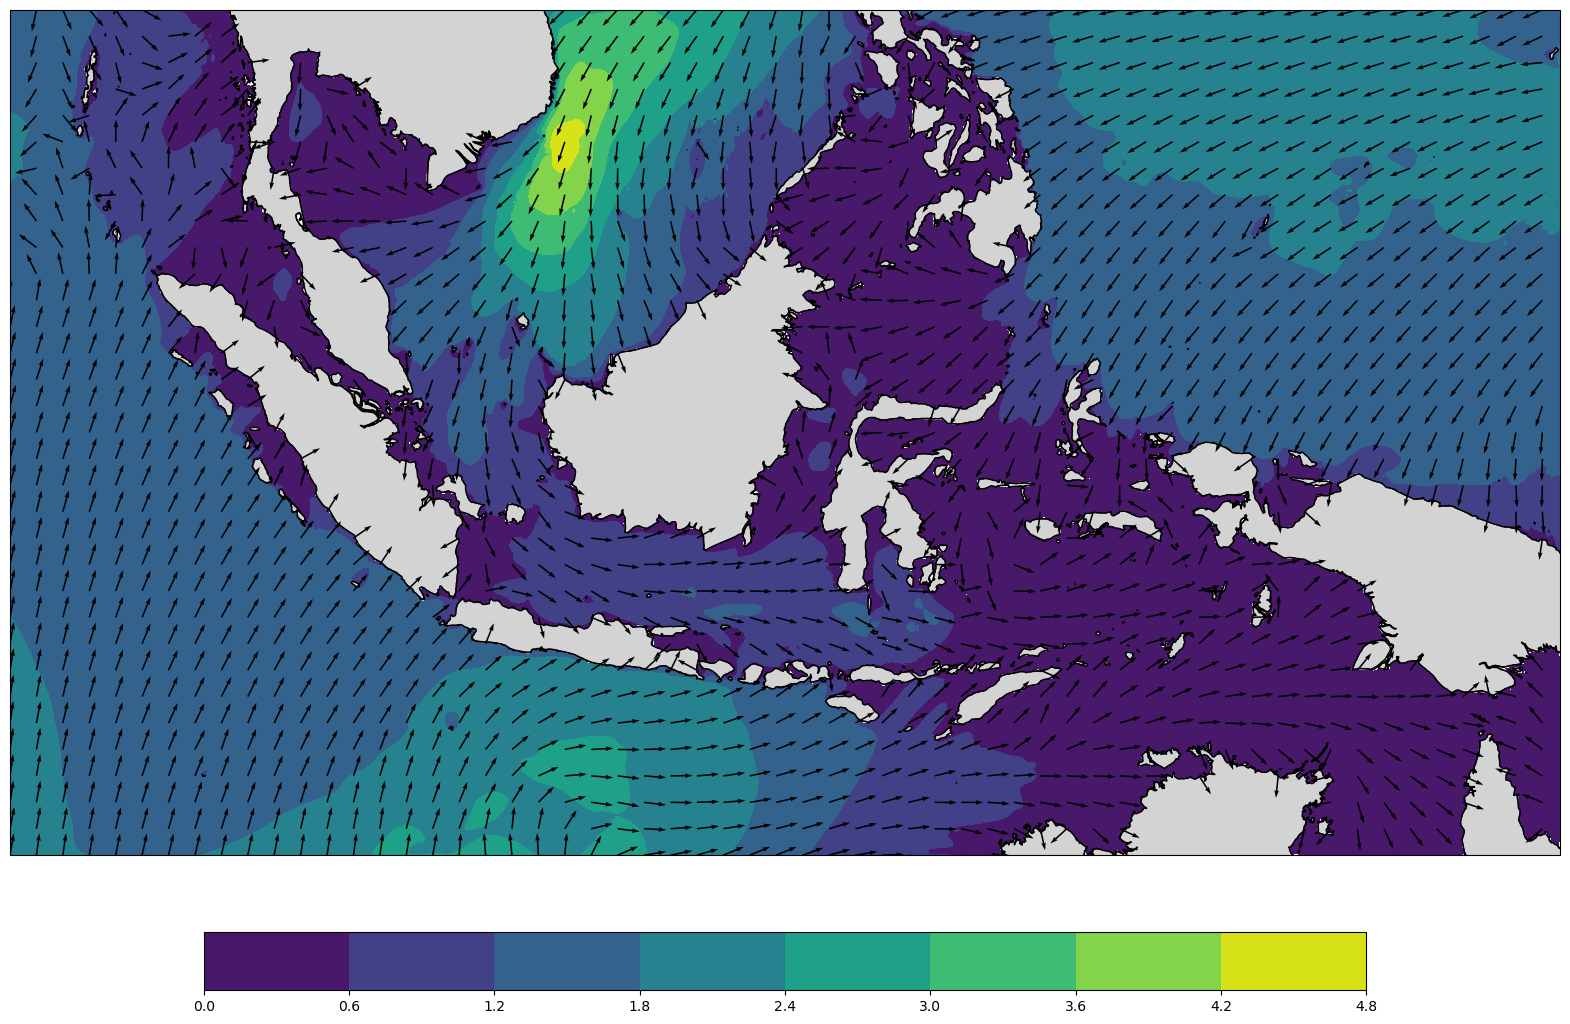

In [148]:
lon = dset.lon.data
lat = dset.lat.data
data = dset.hs[0].data
uwave = np.cos(np.deg2rad(dset.dir[0].data))
vwave = np.sin(np.deg2rad(dset.dir[0].data))
arw_int = 15
arr_width = 0.001
arr_scale = 70 # length

fig, ax = plt.subplots(figsize=(20,20), subplot_kw={'projection':ccrs.PlateCarree()})
extent = [90, 145, -12, 10]

ax.coastlines('10m')
ax.add_feature(cartopy.feature.LAND, facecolor='lightgrey', edgecolor='black')
mag = ax.contourf(lon, lat, data, transform=ccrs.PlateCarree())
ax.quiver(lon[::arw_int], lat[::arw_int], uwave[::arw_int,::arw_int], vwave[::arw_int,::arw_int], width=arr_width, scale=arr_scale, transform=ccrs.PlateCarree())

plt.colorbar(mag, shrink=.75, pad=0.05, orientation='horizontal')

> **📝LATIHAN**
> - Beberapa arow terlihat sampai menutupi wilayah darat, sesuaikan agar darat yang menutupi arrow. hint: gunakan argument `zorder`.
> - Tambahkan fitur cartopy batas negara. hint: gunakan method `.BORDER` pada `cartopy.feature`.
> - Tambahkan informasi seperti gridlines, judul peta, dan label colorbar.
> - Coba untuk mengubah anatomi arrow, terlihat bahwa bagian head arrow proporsinya cukup kecil dibanding panjangnya. hint: gunakan argument `.headwidth`, `.headaxislength`, dan `.headlength`.

## Layering shapefile

Data shapefile dapat dimanipulasi menggunakan library `geopandas`.

In [152]:
# load shapefile

import geopandas as gpd

shp = gpd.read_file("/data/local/shpmetoswilpro/METOS_WILPRO_20231018.shp")
shp

ERROR 1: PROJ: proj_create_from_database: Open of /home/tyo/miniconda3/envs/ofs/share/proj failed


,FID_METOS_,OBJECTID,DIS,Perairan,Met_Area,Label,ID,sub_ID,ID_MAR,ID_Stat,wilpro,geometry
0,34,1,1.0,None,Laut Arafuru bagian tengah,M,34,None,M. .34,None,None,"POLYGON Z ((136.60373 -5.05887 0, 136.67687 -5..."
1,16,1,1.0,None,Samudra Hindia selatan NTT,M,16,None,M. .16,None,None,"POLYGON Z ((118.6756 -9.55198 0, 118.75928 -9...."
2,43,1,1.0,None,Samudra Pasifik utara Papua,M,43,None,M. .43,None,None,"POLYGON Z ((135.05306 -0.23913 0, 134.66088 -0..."
3,2,1,1.0,None,Selat Malaka bagian tengah,M,02,None,M. .02,None,None,"POLYGON Z ((101.0024 2.8619 0, 101.00152 2.862..."
4,3,1,1.0,None,Samudra Hindia barat Aceh,M,03,None,M. .03,None,None,"POLYGON Z ((94.85965 6.01528 0, 94.8417 5.9791..."
...,...,...,...,...,...,...,...,...,...,...,...,...
368,2,9,3.0,Sulawesi Tengah,None,P,33,None,P.AC.33,AC,Perairan Banggai Kepulauan,"POLYGON Z ((123.76942 -1.42191 0, 123.55438 -1..."
369,2,9,3.0,Sulawesi Tengah,None,P,12,None,P.AC.12,AC,Perairan Morowali,"POLYGON Z ((123.45142 -3.47462 0, 123.45274 -3..."
370,2,9,3.0,Sulawesi Tengah,None,P,12,None,P.AC.12,AC,Perairan Morowali Utara,"POLYGON Z ((122.13726 -1.80348 0, 122.07638 -1..."
371,2,9,3.0,Sulawesi Tengah,None,P,12,None,P.AC.12,AC,Teluk Tolo,"POLYGON Z ((123.45142 -3.47462 0, 123.29872 -3..."


In [158]:
type(shp)

geopandas.geodataframe.GeoDataFrame

In [161]:
shp.Label.unique()

array(['M', 'P'], dtype=object)

In [179]:
shp.Perairan.unique()

array([None, 'Aceh', 'Sumatra Utara', 'Riau', 'Sumatra Barat', 'Bengkulu',
       'Jambi', 'Sumatra Selatan', 'Jawa Barat', 'Jawa Tengah',
       'Kep. Riau', 'Kalimantan Barat', 'Kep. Bangka Belitung',
       'DKI Jakarta', 'Kalimantan Selatan', 'Kalimantan Utara',
       'Kalimantan Timur', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur',
       'Gorontalo', 'Sulawesi Tengah', 'Sulawesi Selatan', 'Maluku Utara',
       'Sulawesi Utara', 'Papua', 'Papua Tengah', 'Papua Selatan',
       'DI Yogyakarta', 'Maluku', 'Sulawesi Barat', 'Kalimantan Tengah',
       'Jawa Timur', 'Banten', 'Lampung', 'Papua Barat Daya',
       'Papua Barat', 'Sulawesi Tenggara', 'Bali'], dtype=object)

Data shapefile di atas merupakan gabungan antara shp METOS (Met-Osean Area) yang dikelola oleh Pusat dan Wilpro (Wilayah Provinsi) yang dikelola oleh UPT. Dalam praktik ini, kita akan mencoba mengolah khusus untuk wilayah METOS.

Manipulasi tipe data geodataframe sepenuhnya identik dengan pandas DataFrame.

In [163]:
# Seleksi data untuk ilayah METOS berdasarkan kolom Label

shpmetos = shp[shp['Label'] == 'M']
shpmetos.head()

,FID_METOS_,OBJECTID,DIS,Perairan,Met_Area,Label,ID,sub_ID,ID_MAR,ID_Stat,wilpro,geometry
0,34,1,1.0,None,Laut Arafuru bagian tengah,M,34,None,M. .34,None,None,"POLYGON Z ((136.60373 -5.05887 0, 136.67687 -5..."
1,16,1,1.0,None,Samudra Hindia selatan NTT,M,16,None,M. .16,None,None,"POLYGON Z ((118.6756 -9.55198 0, 118.75928 -9...."
2,43,1,1.0,None,Samudra Pasifik utara Papua,M,43,None,M. .43,None,None,"POLYGON Z ((135.05306 -0.23913 0, 134.66088 -0..."
3,2,1,1.0,None,Selat Malaka bagian tengah,M,02,None,M. .02,None,None,"POLYGON Z ((101.0024 2.8619 0, 101.00152 2.862..."
4,3,1,1.0,None,Samudra Hindia barat Aceh,M,03,None,M. .03,None,None,"POLYGON Z ((94.85965 6.01528 0, 94.8417 5.9791..."


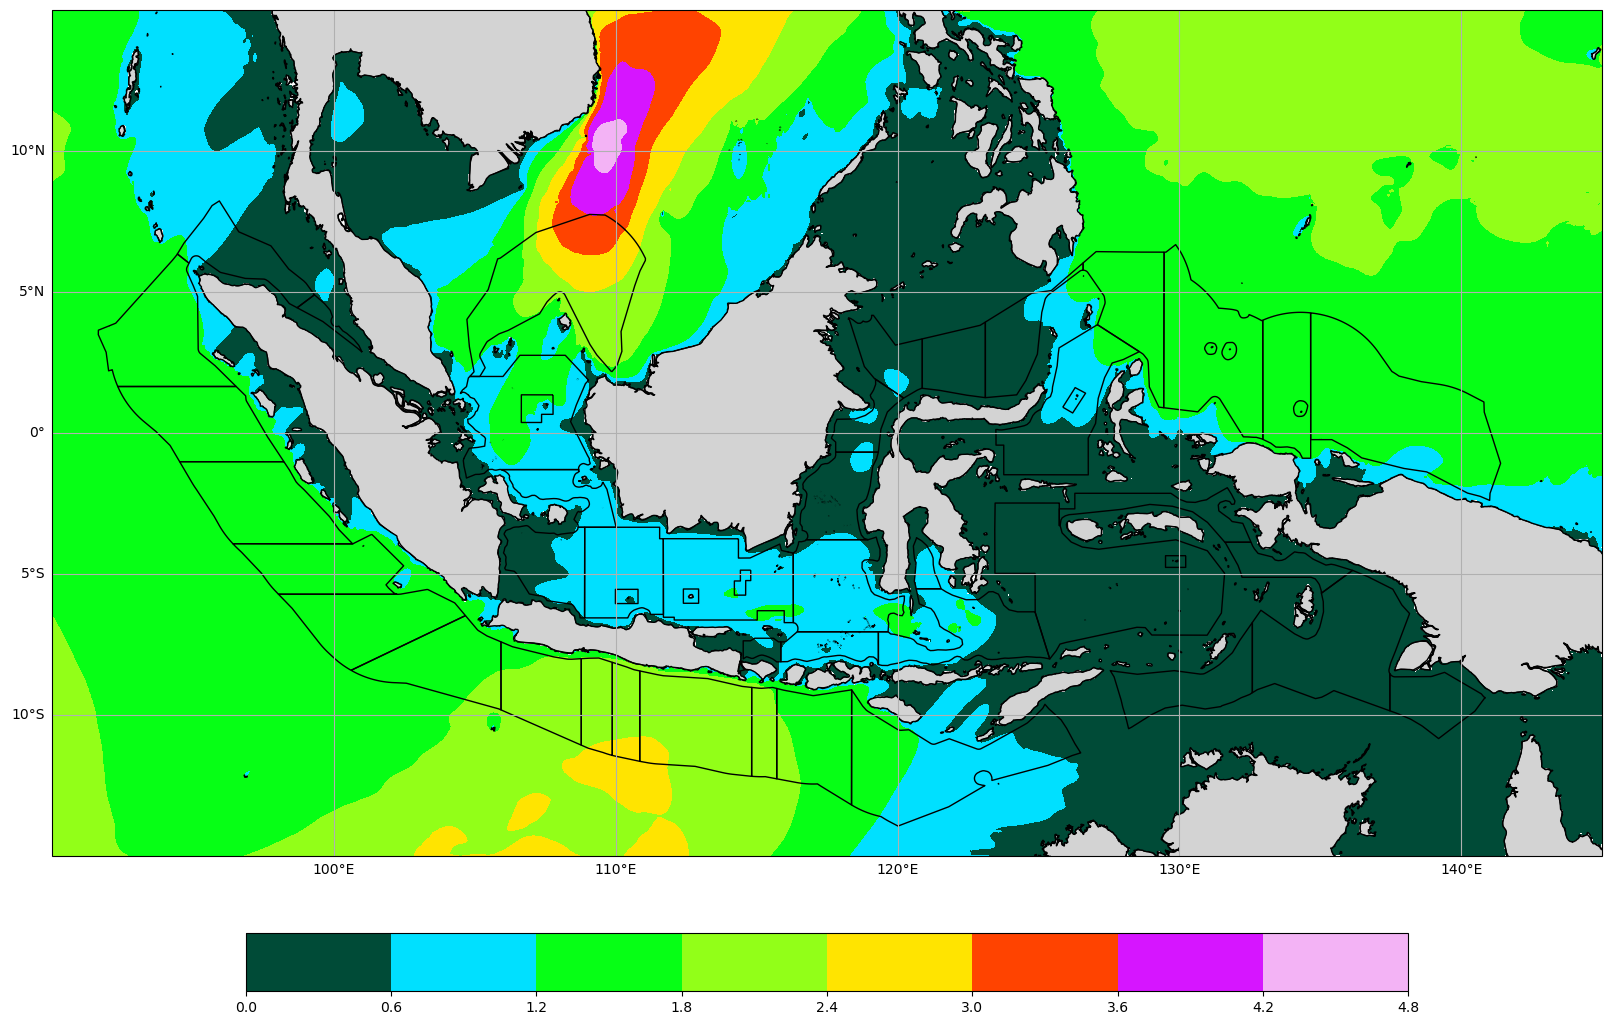

In [183]:
# LAYERING DI CARTOPY

fig, ax = plt.subplots(figsize=(20,20), subplot_kw={'projection':ccrs.PlateCarree()})
extent = [90, 145, -12, 10]

ax.coastlines('10m')
ax.add_feature(cartopy.feature.LAND, facecolor='lightgrey', edgecolor='black')
mag = ax.contourf(dset.lon.data, dset.lat.data, dset.hs[0].data, cmap='gist_ncar', transform=ccrs.PlateCarree())
shpmetos.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1, transform=ccrs.PlateCarree())

gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

plt.colorbar(mag, shrink=.75, pad=0.05, orientation='horizontal')

Clipping dapat dilakukan dengan bantuan module `rioxarray`.

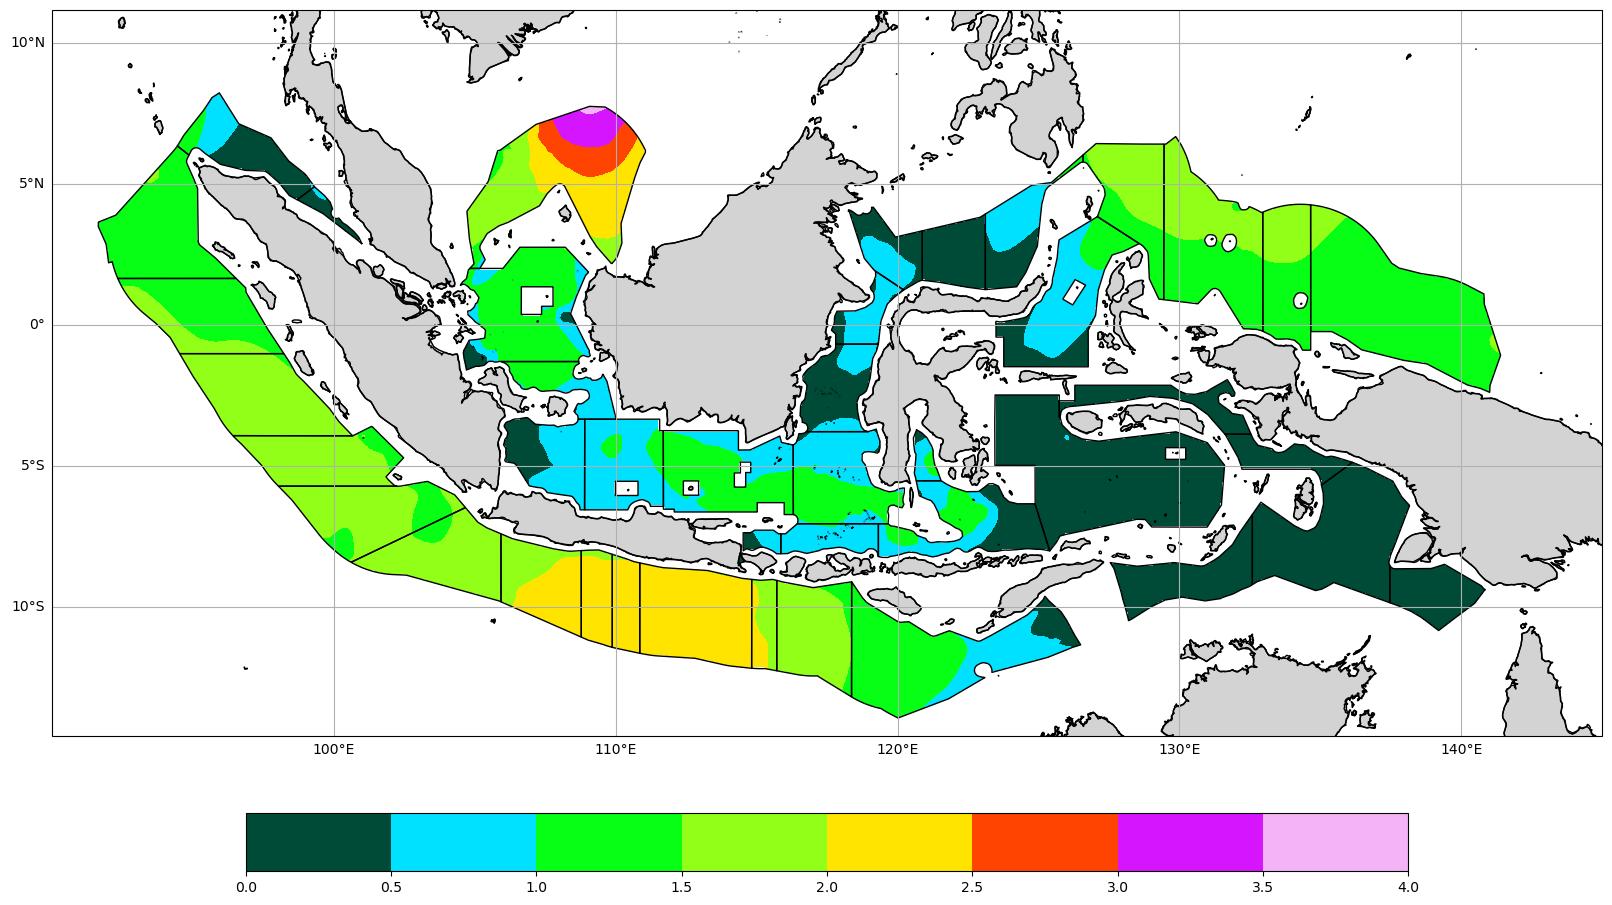

In [182]:
import rioxarray

shpmetos = shpmetos.to_crs("EPSG:4326")

clipped = dset.hs[0].rio.write_crs("EPSG:4326").rio.clip(shpmetos.geometry, shpmetos.crs, drop=True)

fig, ax = plt.subplots(figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([90, 145, -13, 10])
ax.coastlines('10m')
ax.add_feature(cartopy.feature.LAND, facecolor='lightgrey', edgecolor='black')

mag = ax.contourf(clipped.lon.data, clipped.lat.data, clipped.data, cmap='gist_ncar', transform=ccrs.PlateCarree())

shpmetos.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1, transform=ccrs.PlateCarree())

gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

plt.colorbar(mag, shrink=.75, pad=0.05, orientation='horizontal')

> **📝LATIHAN**
> 1. Buat Peta serupa untuk wilayah Provinsi masing-masing peserta berasal (UPT).

> Hint: Buat seleksi Geodataframe berdasarkan Kolom `Perairan`. Contoh:
> ```python
> shpaceh = shp[shp['Perairan'] == 'Aceh']
> ```

> 2. Plot juga perlu ditambahkan informasi judul dan label colorbar
> 3. Coba juga untuk memplot arah gelombang menggunakan `.quiver`